### Importing Required Libraries

In [2]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.impute import SimpleImputer
from sklearn.model_selection import cross_val_score, StratifiedKFold
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import matthews_corrcoef


### Loading dataset

In [3]:
df = pd.read_csv('spambase.csv')

### Basic info

In [4]:
print("Dataset Info:\n", df.info())
print("\nFirst 5 rows:\n", df.head())
print("\nMissing Values:\n", df.isnull().sum())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4601 entries, 0 to 4600
Data columns (total 58 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   word_freq_make              4601 non-null   float64
 1   word_freq_address           4601 non-null   float64
 2   word_freq_all               4601 non-null   float64
 3   word_freq_3d                4601 non-null   float64
 4   word_freq_our               4601 non-null   float64
 5   word_freq_over              4601 non-null   float64
 6   word_freq_remove            4601 non-null   float64
 7   word_freq_internet          4601 non-null   float64
 8   word_freq_order             4601 non-null   float64
 9   word_freq_mail              4601 non-null   float64
 10  word_freq_receive           4601 non-null   float64
 11  word_freq_will              4601 non-null   float64
 12  word_freq_people            4601 non-null   float64
 13  word_freq_report            4601 

### Handling missing values

In [5]:
imputer = SimpleImputer(strategy='mean')
df_imputed = pd.DataFrame(imputer.fit_transform(df), columns=df.columns)

### Splitting of feature and target

In [6]:
X = df_imputed.drop('class', axis=1)
y = df_imputed['class']

### Checking Distribution

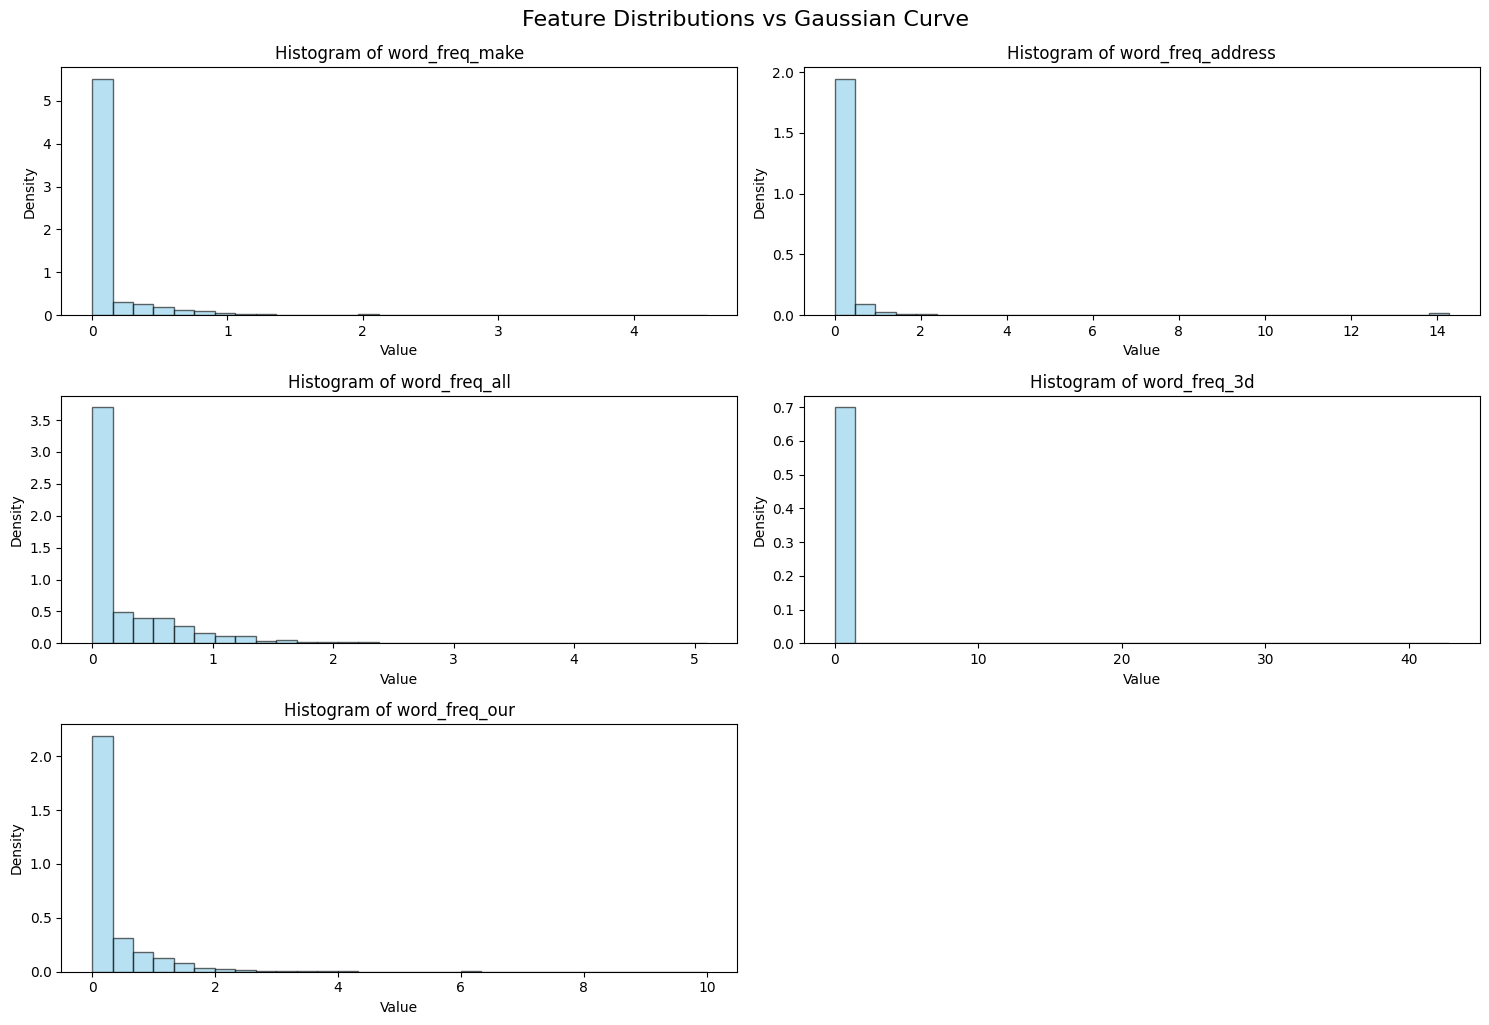

In [7]:
X = df.drop('class', axis=1)  # Assuming 'class' is the target

# Choose a few features to visualize
sample_features = X.columns[:5]  # First 5 features

# Plot histograms with Gaussian curve overlay
plt.figure(figsize=(15, 10))
for i, feature in enumerate(sample_features):
    plt.subplot(3, 2, i + 1)
    data = X[feature]

    # Plot histogram
    count, bins, ignored = plt.hist(data, bins=30, density=True, alpha=0.6, color='skyblue', edgecolor='black')

    # Plot normal distribution curve
    '''mu, std = data.mean(), data.std()
    xmin, xmax = plt.xlim()
    x = np.linspace(xmin, xmax, 100)
    p = 1 / (std * np.sqrt(2 * np.pi)) * np.exp(-(x - mu)**2 / (2 * std**2))
    plt.plot(x, p, 'r', linewidth=2)'''

    plt.title(f'Histogram of {feature}')
    plt.xlabel('Value')
    plt.ylabel('Density')

plt.tight_layout()
plt.suptitle('Feature Distributions vs Gaussian Curve', fontsize=16, y=1.02)
plt.show()


### Applying min max scaling

In [8]:
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)

##Plots

### Histogram

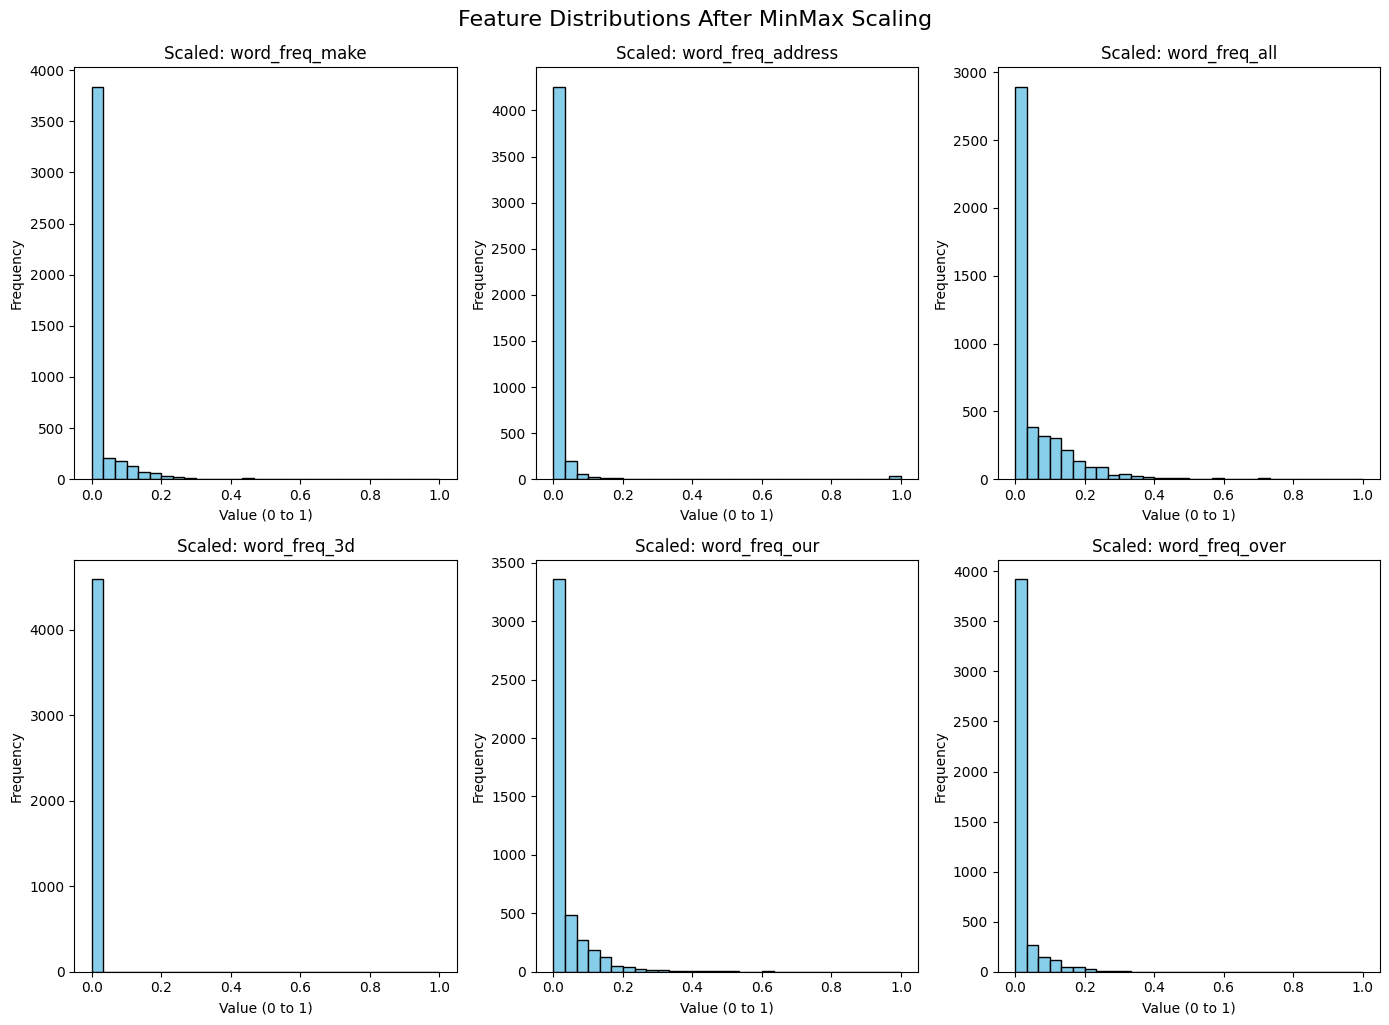

In [9]:
import matplotlib.pyplot as plt

plt.figure(figsize=(14, 10))
for i in range(6):  # first 6 features as an example
    plt.subplot(2, 3, i + 1)
    plt.hist(X_scaled[:, i], bins=30, color='skyblue', edgecolor='black')
    plt.title(f'Scaled: {X.columns[i]}')
    plt.xlabel('Value (0 to 1)')
    plt.ylabel('Frequency')
plt.tight_layout()
plt.suptitle('Feature Distributions After MinMax Scaling', fontsize=16, y=1.02)
plt.show()


### Boxplot

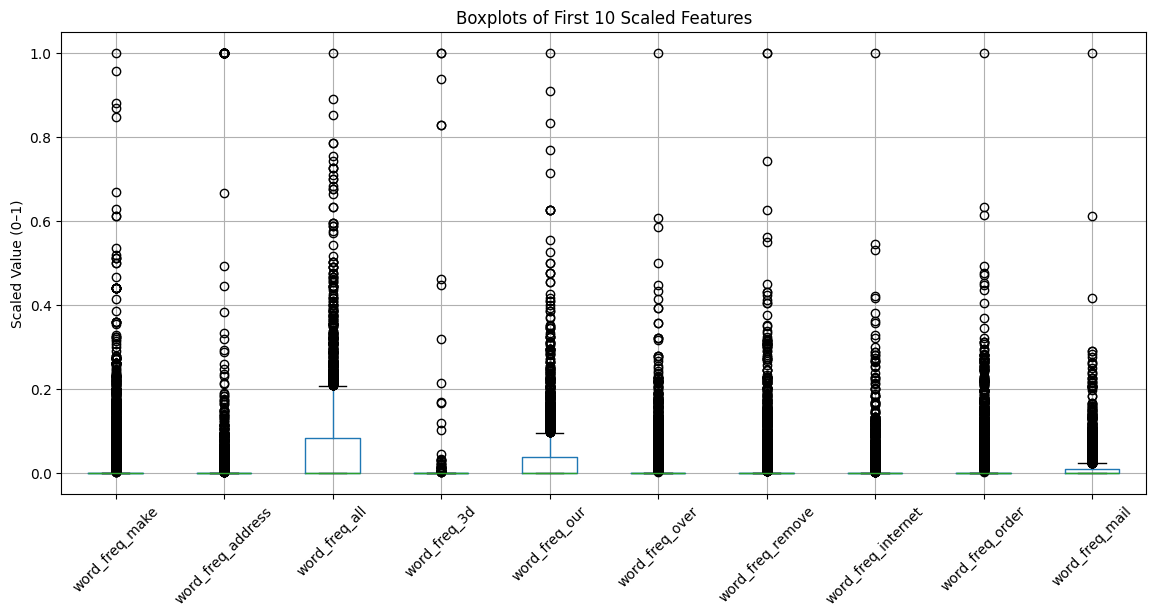

In [10]:
import pandas as pd

# Convert scaled array back to DataFrame for easier plotting
X_scaled_df = pd.DataFrame(X_scaled, columns=X.columns)

plt.figure(figsize=(14, 6))
X_scaled_df.iloc[:, :10].boxplot(rot=45)
plt.title('Boxplots of First 10 Scaled Features')
plt.ylabel('Scaled Value (0‚Äì1)')
plt.grid(True)
plt.show()


### Correlation HeatMap

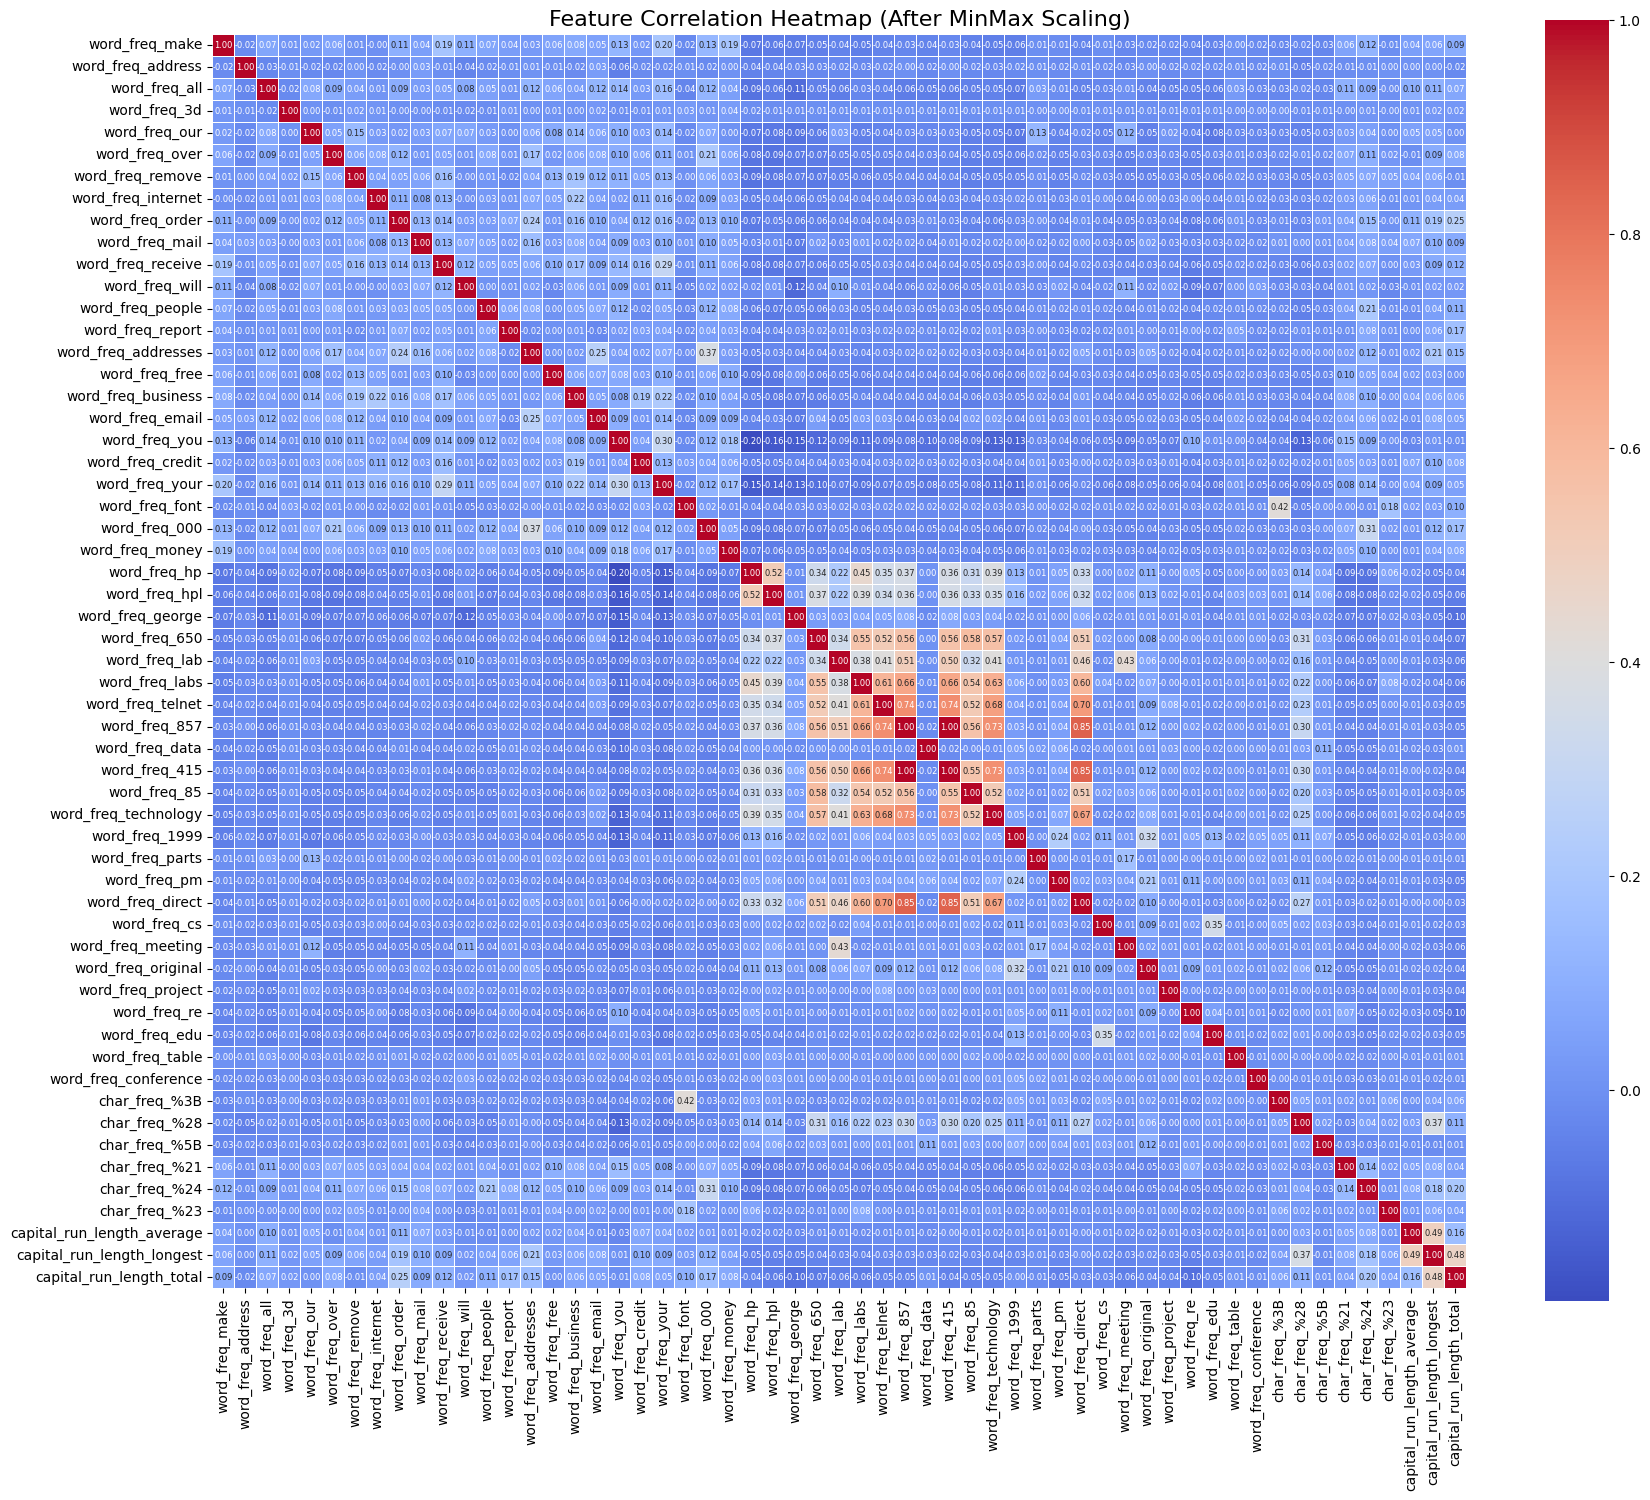

In [11]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

# Assuming X_scaled_df is your scaled DataFrame
corr_matrix = X_scaled_df.corr()

plt.figure(figsize=(18, 15))  # Bigger figure
sns.heatmap(
    corr_matrix,
    cmap='coolwarm',
    square=True,
    annot=True,               # Show values inside squares
    fmt=".2f",                # Format to 2 decimal places
    linewidths=0.5,           # Thin grid lines
    annot_kws={"size": 6}     # Smaller font size
)

plt.xticks(rotation=90)
plt.yticks(rotation=0)
plt.title("Feature Correlation Heatmap (After MinMax Scaling)", fontsize=16)
plt.tight_layout()
plt.show()


### Choosing best k value using k-fold cross validation

Cross-Validation Accuracies for Different k:
---------------------------------------------
k =  1 -> Fold Accuracies: [0.9034 0.9076 0.9152 0.9    0.8935] -> Mean Accuracy: 0.9039
k =  2 -> Fold Accuracies: [0.8914 0.8924 0.9076 0.8989 0.8989] -> Mean Accuracy: 0.8978
k =  3 -> Fold Accuracies: [0.8947 0.8989 0.9087 0.9087 0.8946] -> Mean Accuracy: 0.9011
k =  4 -> Fold Accuracies: [0.8947 0.8902 0.9022 0.9043 0.887 ] -> Mean Accuracy: 0.8957
k =  5 -> Fold Accuracies: [0.8969 0.8946 0.9011 0.9054 0.8957] -> Mean Accuracy: 0.8987
k =  6 -> Fold Accuracies: [0.9001 0.8902 0.8967 0.9011 0.888 ] -> Mean Accuracy: 0.8952
k =  7 -> Fold Accuracies: [0.899  0.8978 0.8989 0.8946 0.8924] -> Mean Accuracy: 0.8965
k =  8 -> Fold Accuracies: [0.8914 0.8891 0.9033 0.8946 0.8902] -> Mean Accuracy: 0.8937
k =  9 -> Fold Accuracies: [0.8936 0.8913 0.9065 0.8978 0.8859] -> Mean Accuracy: 0.8950
k = 10 -> Fold Accuracies: [0.8947 0.888  0.9033 0.888  0.888 ] -> Mean Accuracy: 0.8924
k = 11 -> Fold Accu

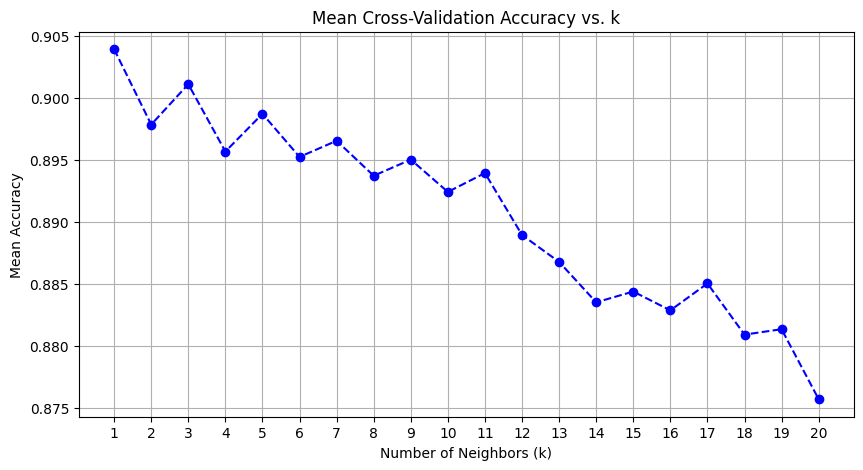


‚úÖ Best k based on mean CV accuracy: 1


In [12]:
# Step 1: 5-Fold Stratified CV Setup
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Step 2: Try different k values
k_range = range(1, 21)
mean_accuracies = []

print("Cross-Validation Accuracies for Different k:")
print("-" * 45)

for k in k_range:
    model = KNeighborsClassifier(n_neighbors=k)
    scores = cross_val_score(model, X_scaled, y, cv=cv, scoring='accuracy')
    mean_accuracies.append(scores.mean())

    print(f"k = {k:2d} -> Fold Accuracies: {np.round(scores, 4)} -> Mean Accuracy: {scores.mean():.4f}")

# Step 3: Plot Mean Accuracy vs. k
plt.figure(figsize=(10, 5))
plt.plot(k_range, mean_accuracies, marker='o', linestyle='--', color='blue')
plt.title('Mean Cross-Validation Accuracy vs. k')
plt.xlabel('Number of Neighbors (k)')
plt.ylabel('Mean Accuracy')
plt.xticks(k_range)
plt.grid(True)
plt.show()

# Step 4: Best k
best_k = k_range[np.argmax(mean_accuracies)]
print(f"\n‚úÖ Best k based on mean CV accuracy: {best_k}")


### Model Training and Evaluation


‚úÖ KNN Evaluation for k = 1
Accuracy : 0.8899
Precision: 0.8551
Recall   : 0.8676
F1 Score : 0.8613
MCC      : 0.7701

Classification Report:
              precision    recall  f1-score   support

         0.0       0.91      0.90      0.91       837
         1.0       0.86      0.87      0.86       544

    accuracy                           0.89      1381
   macro avg       0.88      0.89      0.89      1381
weighted avg       0.89      0.89      0.89      1381


‚úÖ KNN Evaluation for k = 3
Accuracy : 0.8892
Precision: 0.8710
Recall   : 0.8438
F1 Score : 0.8571
MCC      : 0.7670

Classification Report:
              precision    recall  f1-score   support

         0.0       0.90      0.92      0.91       837
         1.0       0.87      0.84      0.86       544

    accuracy                           0.89      1381
   macro avg       0.89      0.88      0.88      1381
weighted avg       0.89      0.89      0.89      1381


‚úÖ KNN Evaluation for k = 5
Accuracy : 0.8993
Precision:

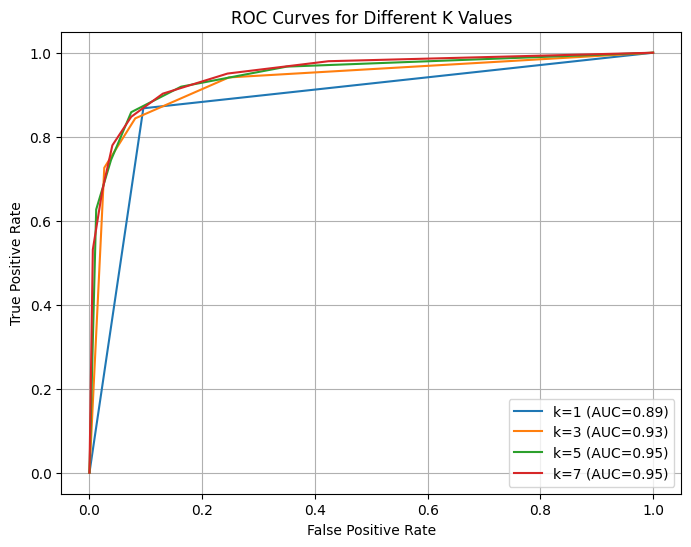


üìä Comparison Table:
   k  Accuracy  Precision    Recall  F1 Score       MCC       AUC
0  1  0.889935   0.855072  0.867647  0.861314  0.770142  0.886034
1  3  0.889211   0.870968  0.843750  0.857143  0.766959  0.931442
2  5  0.899348   0.882798  0.858456  0.870457  0.788392  0.945145
3  7  0.895004   0.881453  0.847426  0.864105  0.779014  0.950240


In [21]:

from sklearn.metrics import (
    accuracy_score, precision_score, recall_score,
    f1_score, confusion_matrix, roc_curve, auc,
    classification_report
)

# Split the data again (or reuse your earlier split)
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.3, stratify=y, random_state=42
)

# Store results
knn_results = []

# Plot setup for ROC
plt.figure(figsize=(8, 6))

# Loop through different k values
for k in [1, 3, 5, 7]:
    model = KNeighborsClassifier(n_neighbors=k)
    model.fit(X_train, y_train)
    
    y_pred = model.predict(X_test)
    y_prob = model.predict_proba(X_test)[:, 1]
    
    acc = accuracy_score(y_test, y_pred)
    prec = precision_score(y_test, y_pred, zero_division=0)
    rec = recall_score(y_test, y_pred, zero_division=0)
    f1 = f1_score(y_test, y_pred, zero_division=0)
    mcc = matthews_corrcoef(y_test, y_pred)
    
    fpr, tpr, _ = roc_curve(y_test, y_prob)
    roc_auc = auc(fpr, tpr)
    
    # Plot ROC
    plt.plot(fpr, tpr, label=f'k={k} (AUC={roc_auc:.2f})')
    
    print(f"\n‚úÖ KNN Evaluation for k = {k}")
    print(f"Accuracy : {acc:.4f}")
    print(f"Precision: {prec:.4f}")
    print(f"Recall   : {rec:.4f}")
    print(f"F1 Score : {f1:.4f}")
    print(f"MCC      : {mcc:.4f}")
    print("\nClassification Report:")
    print(classification_report(y_test, y_pred, zero_division=0))
    
    knn_results.append({
        'k': k,
        'Accuracy': acc,
        'Precision': prec,
        'Recall': rec,
        'F1 Score': f1,
        'MCC': mcc,
        'AUC': roc_auc
    })

# Final ROC Curve Plot
plt.title("ROC Curves for Different K Values")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.grid(True)
plt.legend()
plt.show()

# Comparison Table
knn_df = pd.DataFrame(knn_results)
print("\nüìä Comparison Table:")
print(knn_df)

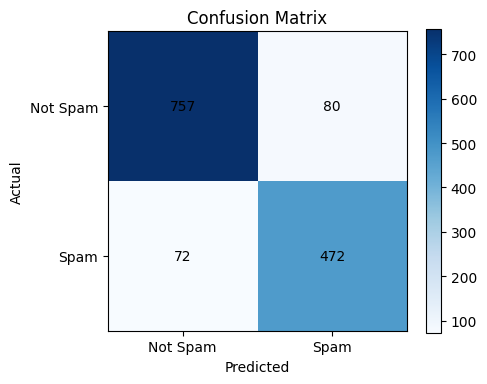

In [15]:
conf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(5, 4))
plt.imshow(conf_matrix, cmap='Blues')
plt.title('Confusion Matrix')
plt.colorbar()
plt.xticks([0, 1], ['Not Spam', 'Spam'])
plt.yticks([0, 1], ['Not Spam', 'Spam'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
for i in range(2):
    for j in range(2):
        plt.text(j, i, conf_matrix[i, j], ha='center', va='center', color='black')
plt.tight_layout()
plt.show()

### KD Tree and Ball Tree

In [17]:
# Use KDTree
model_kd = KNeighborsClassifier(n_neighbors=best_k, algorithm='kd_tree')
model_kd.fit(X_train, y_train)

# Use BallTree
model_ball = KNeighborsClassifier(n_neighbors=best_k, algorithm='ball_tree')
model_ball.fit(X_train, y_train)

KNeighborsClassifier(algorithm='ball_tree', n_neighbors=1)


üîç KDTree Performance Metrics:
Accuracy : 0.8899
Precision: 0.8551
Recall   : 0.8676
F1 Score : 0.8613
MCC      : 0.7701

Classification Report:
               precision    recall  f1-score   support

         0.0       0.91      0.90      0.91       837
         1.0       0.86      0.87      0.86       544

    accuracy                           0.89      1381
   macro avg       0.88      0.89      0.89      1381
weighted avg       0.89      0.89      0.89      1381



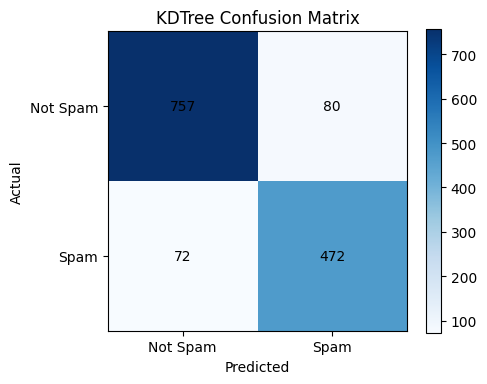

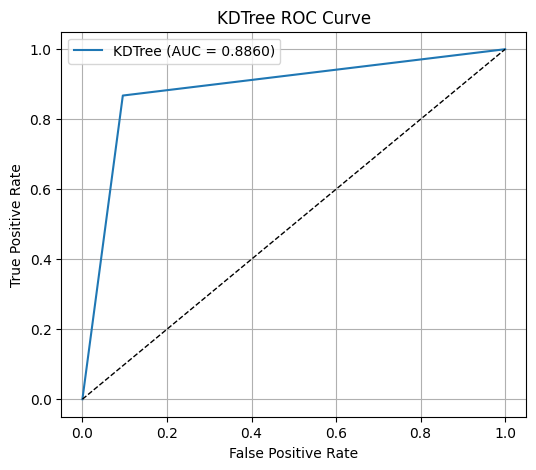


üîç BallTree Performance Metrics:
Accuracy : 0.8899
Precision: 0.8551
Recall   : 0.8676
F1 Score : 0.8613
MCC      : 0.7701

Classification Report:
               precision    recall  f1-score   support

         0.0       0.91      0.90      0.91       837
         1.0       0.86      0.87      0.86       544

    accuracy                           0.89      1381
   macro avg       0.88      0.89      0.89      1381
weighted avg       0.89      0.89      0.89      1381



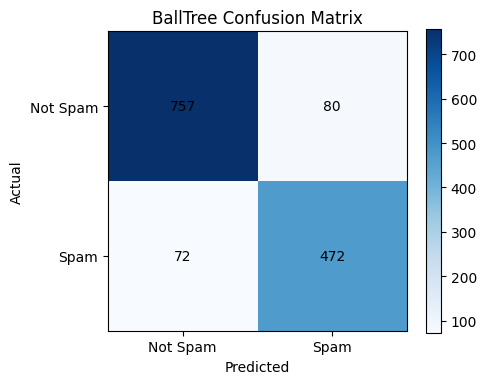

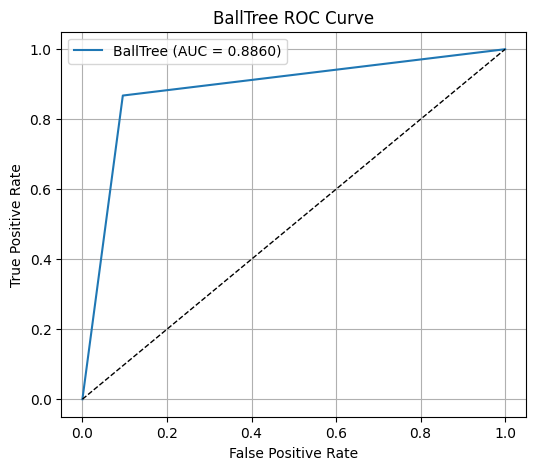

In [18]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score,
    f1_score, confusion_matrix, roc_curve, auc,
    classification_report, matthews_corrcoef
)
import matplotlib.pyplot as plt

# Helper function to evaluate a model
def evaluate_knn_model(name, model, X_train, X_test, y_train, y_test):
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    y_prob = model.predict_proba(X_test)[:, 1]

    acc = accuracy_score(y_test, y_pred)
    prec = precision_score(y_test, y_pred)
    rec = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    mcc = matthews_corrcoef(y_test, y_pred)
    fpr, tpr, _ = roc_curve(y_test, y_prob)
    roc_auc = auc(fpr, tpr)

    print(f"\nüîç {name} Performance Metrics:")
    print(f"Accuracy : {acc:.4f}")
    print(f"Precision: {prec:.4f}")
    print(f"Recall   : {rec:.4f}")
    print(f"F1 Score : {f1:.4f}")
    print(f"MCC      : {mcc:.4f}")
    print("\nClassification Report:\n", classification_report(y_test, y_pred))

    # Confusion Matrix
    conf = confusion_matrix(y_test, y_pred)
    plt.figure(figsize=(5, 4))
    plt.imshow(conf, cmap='Blues')
    plt.title(f'{name} Confusion Matrix')
    plt.colorbar()
    plt.xticks([0, 1], ['Not Spam', 'Spam'])
    plt.yticks([0, 1], ['Not Spam', 'Spam'])
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    for i in range(2):
        for j in range(2):
            plt.text(j, i, conf[i, j], ha='center', va='center')
    plt.tight_layout()
    plt.show()

    # ROC Curve
    plt.figure(figsize=(6, 5))
    plt.plot(fpr, tpr, label=f'{name} (AUC = {roc_auc:.4f})')
    plt.plot([0, 1], [0, 1], 'k--', linewidth=1)
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title(f'{name} ROC Curve')
    plt.legend()
    plt.grid(True)
    plt.show()

# Train-test split assumed done:
# X_train, X_test, y_train, y_test already available
# best_k is selected

# Evaluate KDTree
knn_kd = KNeighborsClassifier(n_neighbors=best_k, algorithm='kd_tree')
evaluate_knn_model("KDTree", knn_kd, X_train, X_test, y_train, y_test)

# Evaluate BallTree
knn_ball = KNeighborsClassifier(n_neighbors=best_k, algorithm='ball_tree')
evaluate_knn_model("BallTree", knn_ball, X_train, X_test, y_train, y_test)


In [26]:
import time

for algo in ['kd_tree', 'ball_tree', 'brute']:
    model = KNeighborsClassifier(n_neighbors=best_k, algorithm=algo)
    start = time.time()
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    duration = time.time() - start
    acc = accuracy_score(y_test, y_pred)
    print(f"{algo:10} ‚Üí Accuracy: {acc:.4f}, Time: {duration:.4f} sec")


kd_tree    ‚Üí Accuracy: 0.8899, Time: 0.4470 sec
ball_tree  ‚Üí Accuracy: 0.8899, Time: 0.4058 sec
brute      ‚Üí Accuracy: 0.8899, Time: 0.0192 sec
